<br><font color='Green' size=5><b><center>MODELLING</center></b></font><br>
<font color='Green' size=3><b><center>Project: Analysis of different measures taken by different countries to control the spread of Covid-19 virus</center></b></font><br>
<font color='Green' size=3><b>Team Members</b></font><br>
<font color='Green' size=3>Nisha Ramrakhyani (Student Id: 801208678)</font><br>
<font color='Green' size=3>Punit Mashruwala (Student Id: 801208416)</font><br>
<font color='Green' size=3>Zalak Panchal (Student Id: 801196881)</font>

**Research Question:**
*Building a model to forecast the number of Covid cases across the world*


<font color ='black'>This basic Jupyter Notebook shows exploratory analysis of number of covid cases across the world, no. of deaths across the world and the predictive model for forecasting the number of covid cases across the world. 
</font>

In [10]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer 

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
dataset = pd.read_excel('covid_19_data.xlsx')
# print(dataset.head())
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4143 entries, 0 to 4142
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   4143 non-null   int64         
 1   ISO                  4143 non-null   object        
 2   COUNTRY              4143 non-null   object        
 3   REGION               4143 non-null   object        
 4   LOG_TYPE             4143 non-null   object        
 5   CATEGORY             4143 non-null   object        
 6   MEASURE              4143 non-null   object        
 7   TARGETED_POP_GROUP   1386 non-null   object        
 8   COMMENTS             4137 non-null   object        
 9   NON_COMPLIANCE       4095 non-null   object        
 10  DATE_IMPLEMENTED     4117 non-null   datetime64[ns]
 11  SOURCE               4142 non-null   object        
 12  SOURCE_TYPE          4142 non-null   object        
 13  LINK                 4141 non-nul

In [5]:
df = dataset[['COUNTRY','CATEGORY', 'MEASURE', 'COMMENTS', 'DATE_IMPLEMENTED', 'covid_case_per_date', 'population']]
print(df.head())

     COUNTRY                                CATEGORY  \
0  Australia  Governance and socio-economic measures   
1  Australia  Governance and socio-economic measures   
2  Australia                   Movement restrictions   
3  Australia                  Public health measures   
4  Australia                  Public health measures   

                                             MEASURE  \
0  Emergency administrative structures activated ...   
1                                  Economic measures   
2                                  Visa restrictions   
3                  Isolation and quarantine policies   
4             Strengthening the public health system   

                                            COMMENTS DATE_IMPLEMENTED  \
0  Australian Health Sector Emergency Plan Activated       2020-02-17   
1  Implementation of an economic response to the ...       2020-03-01   
2  Citizens from China, Italy, South Korea, Iran,...       2020-03-01   
3  14 days self-quarantine, for na

In [6]:
df['DATE_IMPLEMENTED'] =  pd.to_datetime(df['DATE_IMPLEMENTED'])
print(df['DATE_IMPLEMENTED'])

0      2020-02-17
1      2020-03-01
2      2020-03-01
3      2020-03-01
4      2020-03-12
          ...    
4138   2020-11-02
4139   2020-11-02
4140   2020-11-02
4141   2020-11-02
4142   2020-11-02
Name: DATE_IMPLEMENTED, Length: 4143, dtype: datetime64[ns]


<ipython-input-6-4e7c7897de5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE_IMPLEMENTED'] =  pd.to_datetime(df['DATE_IMPLEMENTED'])


In [7]:
df.isnull().sum()

COUNTRY                 0
CATEGORY                0
MEASURE                 0
COMMENTS                6
DATE_IMPLEMENTED       26
covid_case_per_date    31
population              0
dtype: int64

In [8]:
df = df[df['DATE_IMPLEMENTED'].notna()]
df = df[df['covid_case_per_date'].notna()]
df.isnull().sum()

COUNTRY                0
CATEGORY               0
MEASURE                0
COMMENTS               5
DATE_IMPLEMENTED       0
covid_case_per_date    0
population             0
dtype: int64

In [9]:
country_array = df.COUNTRY.unique()
country_array.sort()
country_array

array(['Australia', 'Belgium', 'Canada', 'France', 'Germany', 'India',
       'Italy', 'Mexico', 'New Zealand', 'Norway', 'Singapore', 'Spain',
       'Sri Lanka', 'Sweden', 'United Kingdom', 'United States'],
      dtype=object)

In [11]:
covid_data = pd.read_excel("new_covid.xlsx")
covid_data
print(covid_data.isnull().sum())

iso_code             0
continent            0
location             0
date                 0
total_cases        196
new_cases           23
total_deaths       764
new_deaths          23
new_tests         1866
total_tests       2075
tests_per_case    1654
population           0
dtype: int64


In [12]:
constant_imputer=SimpleImputer(strategy='constant', fill_value=0)
covid_data.iloc[:]=constant_imputer.fit_transform(covid_data)
print(covid_data.isnull().sum())

iso_code          0
continent         0
location          0
date              0
total_cases       0
new_cases         0
total_deaths      0
new_deaths        0
new_tests         0
total_tests       0
tests_per_case    0
population        0
dtype: int64


In [13]:
dates = covid_data['date'].unique()

In [16]:
# here selected countries are: 'Australia', 'Belgium', 'Canada', 'France', 'Germany', 'India', 'Italy', 'Mexico', 'New Zealand', 'Norway', 'Singapore', 'Spain','Sri Lanka', 'Sweden', 'United Kingdom', 'United States'
confirmed_cases = []
confirmed_deaths = [] 
test_conducted = []
for i in dates:
    dataaa = covid_data[covid_data['date'] == i]
    confirmed_sum = dataaa['total_cases'].sum()
    death_sum = dataaa['total_deaths'].sum()
    test_sum = dataaa['total_tests'].sum()
    
    confirmed_cases.append(confirmed_sum)
    confirmed_deaths.append(death_sum)
    test_conducted.append(test_sum)

# Removing last data as in some of records they are not captured
confirmed_cases = confirmed_cases[:320]
confirmed_deaths = confirmed_deaths[:320]
test_conducted = test_conducted[:320]
# print(confirmed_cases)
# print(confirmed_deaths)
# print(test_conducted)
print(len(confirmed_cases))
print(len(confirmed_deaths))
print(len(test_conducted))

320
320
320


In [17]:
def diff_function(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            val = data[i]-data[i-1]
            if val < 0:
                d.append(0)
            else:
                d.append(val)
                
    return d

In [18]:
daily_increase = diff_function(confirmed_cases)
daily_death = diff_function(confirmed_deaths)
daily_test = diff_function(test_conducted)
# daily_increase

In [19]:
days_since = np.array([i for i in range(len(dates))]).reshape(-1, 1)
# print(days_since)
days_since = days_since[:320]

confirmed_cases = np.array(confirmed_cases).reshape(-1, 1)
confirmed_deaths = np.array(confirmed_deaths).reshape(-1, 1)
test_conducted = np.array(test_conducted).reshape(-1, 1)

In [20]:
days_in_future = 20
print(len(dates))
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-49]
print(len(adjusted_dates))
future_forecast

349
320


array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [21]:
import datetime
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [22]:
future_forecast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

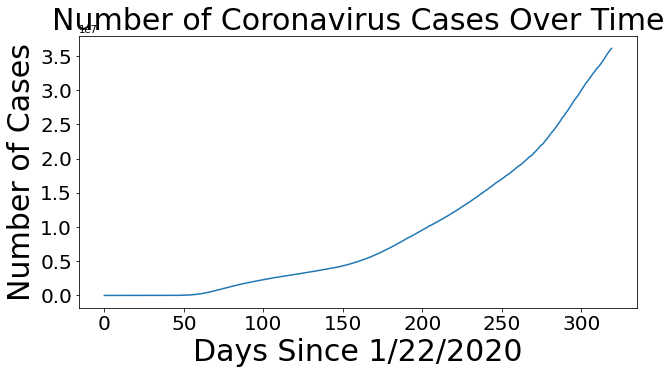

In [32]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(10, 5))
plt.plot(adjusted_dates, confirmed_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

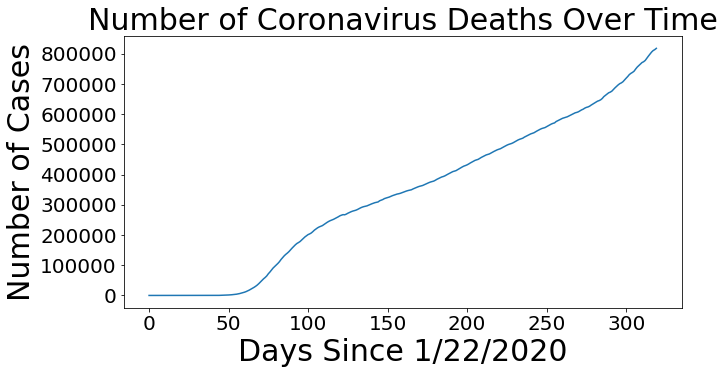

In [33]:
plt.figure(figsize=(10,5))
plt.plot(adjusted_dates, confirmed_deaths)
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since, confirmed_cases, test_size=0.310, shuffle=False)
print(len(X_train_confirmed))
print(len(X_test_confirmed))
print(len(y_train_confirmed))
print(len(y_test_confirmed))

220
100
220
100


In [24]:
# Predicting using Polynomial Features
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [25]:
# Linear regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 760076.3281707081
MSE: 1467099793394.4988


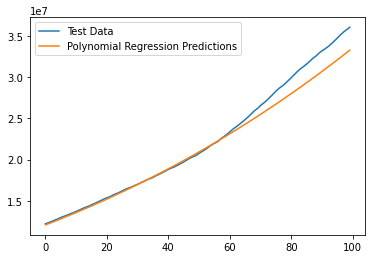

In [26]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [27]:
# Using SVM model to predict

# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MAE: 20024573.832694203
MSE: 586909261681649.8


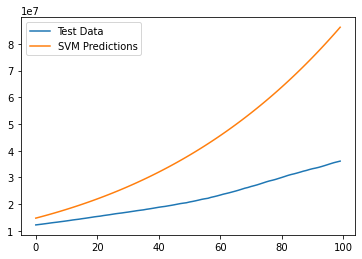

In [28]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [36]:
def plot_predictions(x, y, pred, algo_name, color, line_style, title, x_title, y_title):
    plt.figure(figsize=(10,7))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle=line_style, color=color)
    plt.title(title, size=30)
    plt.xlabel(x_title, size=30)
    plt.ylabel(y_title, size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

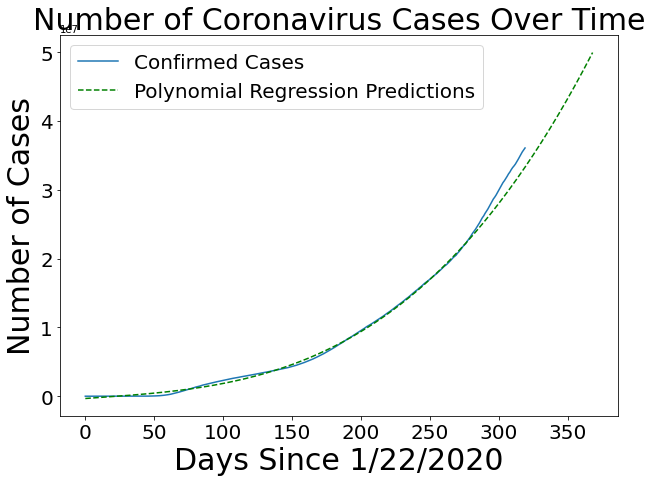

In [37]:
plot_predictions(adjusted_dates, confirmed_cases, linear_pred, 'Polynomial Regression Predictions', 'green', 'dashed', 'Number of Coronavirus Cases Over Time', 'Days Since 1/22/2020' , 'Number of Cases')

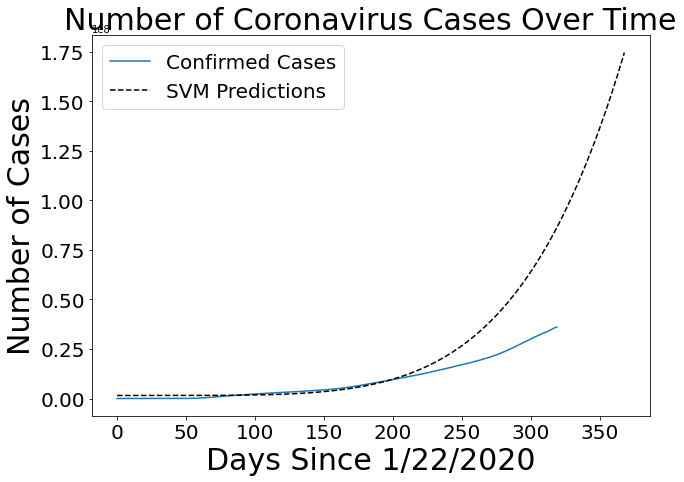

In [39]:
plot_predictions(adjusted_dates, confirmed_cases, svm_pred, 'SVM Predictions', 'black', 'dashed', 'Number of Coronavirus Cases Over Time', 'Days Since 1/22/2020' , 'Number of Cases')

In [41]:
plt.style.use('fivethirtyeight')
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases': np.round(linear_pred[-20:])})
poly_df

,Date,Predicted number of Confirmed Cases
0,01/05/2021,42945960.0
1,01/06/2021,43296904.0
2,01/07/2021,43649815.0
3,01/08/2021,44004697.0
4,01/09/2021,44361556.0
5,01/10/2021,44720399.0
6,01/11/2021,45081230.0
7,01/12/2021,45444056.0
8,01/13/2021,45808882.0
9,01/14/2021,46175713.0


In [42]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'SVM Predicted # of Confirmed Cases': np.round(svm_pred[-20:])})
svm_df

,Date,SVM Predicted # of Confirmed Cases
0,01/05/2021,134261972.0
1,01/06/2021,136174565.0
2,01/07/2021,138109141.0
3,01/08/2021,140065890.0
4,01/09/2021,142045001.0
5,01/10/2021,144046665.0
6,01/11/2021,146071076.0
7,01/12/2021,148118426.0
8,01/13/2021,150188910.0
9,01/14/2021,152282723.0


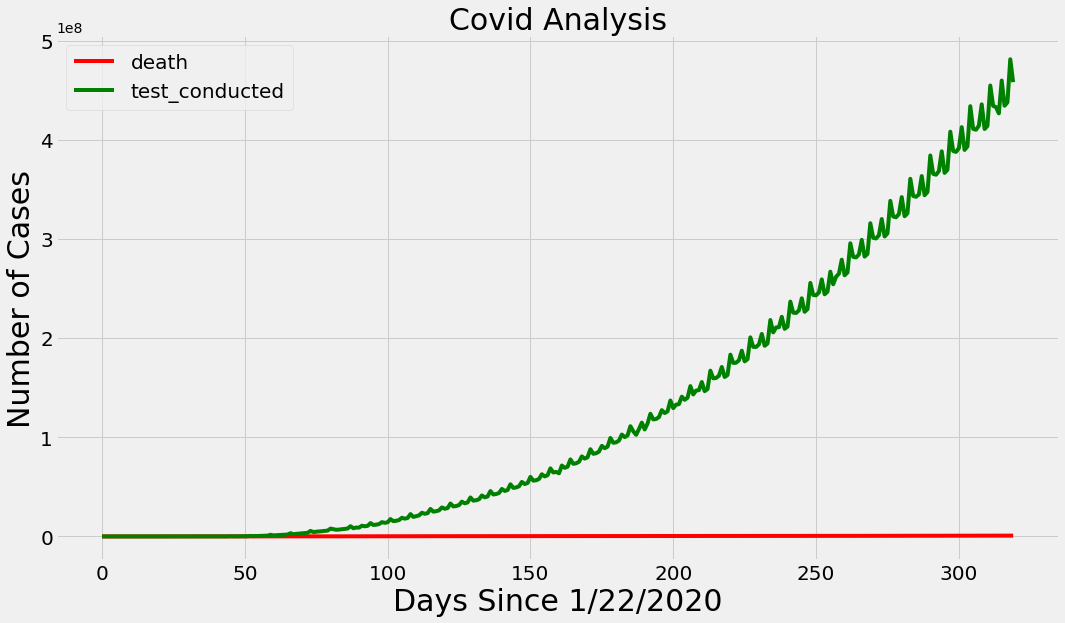

In [43]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, confirmed_deaths, color='r')
plt.plot(adjusted_dates, test_conducted, color='green')
plt.legend(['death', 'test_conducted'], loc='best', fontsize=20)
plt.title('Covid Analysis', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()